# Laboratorio 1 - Data Science

Sara Paguaga 20634

Guillermo Santos 191517

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
import pandas as pd
import seaborn as sns

# Preparación de datos

In [17]:
# Cargando dataset con pandas
data = pd.read_csv('risk_factors_cervical_cancer.csv')
data = pd.DataFrame(data)
data = data.replace('?', np.nan) # Reemplazando ? por NaN para un uso posterior.
data.columns = ['age', 'num_sexual_partners', 'first_sexual_intercourse', 
                'num_pregnancies', 'smokes', 'smokes_years', 'smokes_packs_year', 
                'hormonal_contraceptives', 'hormonal_contraceptives_years', 
								'iud', 'iud_years', 'stds', 'stds_number', 'stds_condylomatosis', 
                'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis', 
								'stds_vulvo_perineal_condylomatosis', 'stds_syphilis', 'stds_pelvic_inflammatory_disease', 
                'stds_genital_herpes', 'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv', 'stds_hepatitis_b', 
								'stds_hpv', 'stds_number_of_diagnosis', 'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis', 
								'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy'
]

missing_values = data.isnull().sum()	# Contando valores faltantes
#print(missing_values)
# Eliminar iuid y iud_years
data = data.drop(['iud', 'iud_years'], axis=1)

## Análisis exploratorio

### Estadística descriptiva - Variables cuantitativas

In [4]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlación de variables y datos atípicos


<Axes: >

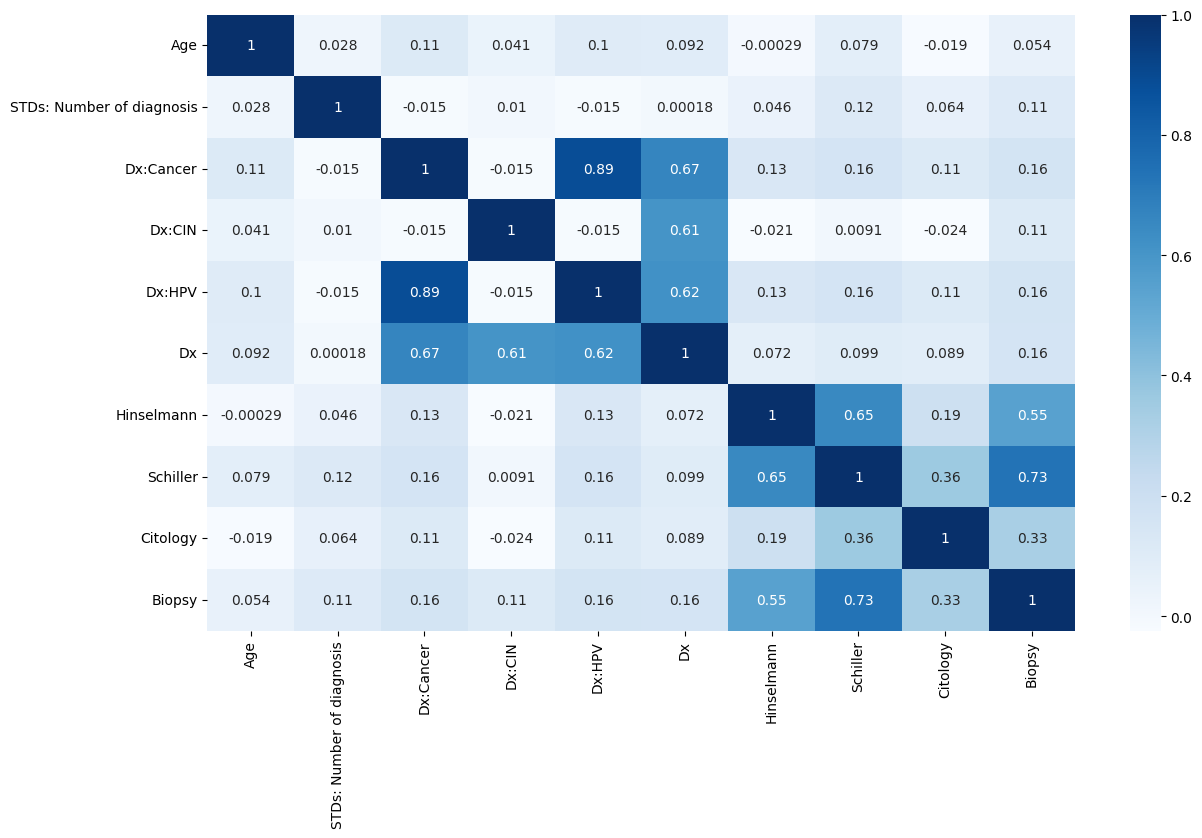

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True,method='spearman'), annot=True, cmap='Blues')